In [2]:
import sys


sys.argv = ['--hidden_size1', '32', '--hidden_size2', '32']


import arg_settings

usage: --hidden_size1 [-h] [--hidden_size1 HIDDEN_SIZE1]
                      [--hidden_size2 HIDDEN_SIZE2]
                      [--learning_rate LEARNING_RATE]
                      [--batch_size BATCH_SIZE] [--epochs EPOCHS]
                      [--weight_decay WEIGHT_DECAY] [--momentum MOMENTUM]
                      [--device DEVICE] [--optimizer OPTIMIZER]
                      [--lr_scheduler LR_SCHEDULER] [--criterion CRITERION]
                      [--model MODEL] [--dataset DATASET]
--hidden_size1: error: unrecognized arguments: 32


SystemExit: 2

In [1]:
arg_settings.TestData.shape

NameError: name 'arg_settings' is not defined

# 决策树MNIST实验

In [1]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)  # 转换标签为整型

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


/tmp/ipykernel_216660/2204734843.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # 转换标签为整型


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [2]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,  # 树的最大深度
    'eta': 0.1,      # 学习率
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 10  # 类别数，因为是 MNIST 所以是 10
}
num_rounds = 50

bst = xgb.train(params, dtrain, num_rounds)

# 预测测试集结果
preds = bst.predict(dtest)
predictions = np.asarray([np.round(val) for val in preds])
accuracy = accuracy_score(y_test, predictions)
print("测试准确率: {:.2f}%".format(accuracy * 100))



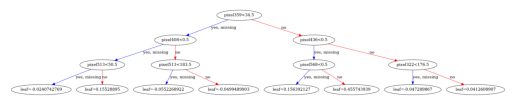

In [4]:
import matplotlib.pyplot as plt


xgb.plot_tree(bst, num_trees=0)
plt.show()


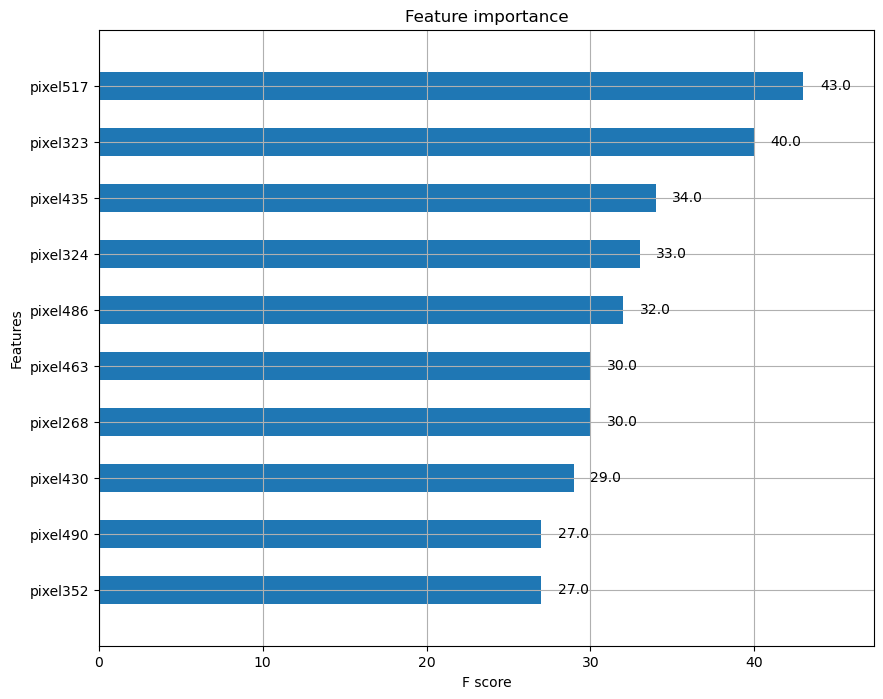

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))  # 设置图形尺寸
xgb.plot_importance(bst, max_num_features=10, height=0.5, ax=ax)  # 仅显示重要性最高的10个特征
plt.show()


In [6]:
from xgboost import cv

params['max_depth'] = 10  # 示例深度
cv_results = cv(params, dtrain, num_boost_round=50, nfold=3, metrics={'merror'}, early_stopping_rounds=10)
print(cv_results)


    train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0            0.055464      8.047499e-04          0.113411         0.002285
1            0.042411      3.271295e-03          0.092071         0.004377
2            0.032598      9.313287e-04          0.080018         0.003516
3            0.026696      5.618320e-04          0.072554         0.002494
4            0.024045      4.157433e-04          0.069929         0.002227
5            0.022098      2.961064e-04          0.067339         0.002298
6            0.020741      3.564076e-04          0.065000         0.002080
7            0.019027      3.363186e-04          0.063696         0.002564
8            0.017598      4.051923e-04          0.062357         0.002671
9            0.016348      4.495715e-04          0.061089         0.002395
10           0.015089      2.457826e-04          0.059929         0.002414
11           0.013929      2.868539e-04          0.058339         0.002164
12           0.012804    

## 使用gpu版决策树

/tmp/ipykernel_253755/2360186988.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # 转换标签为整型


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:04:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:04:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:05:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


测试准确率: 97.38%


NameError: name 'plt' is not defined

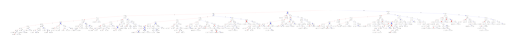

In [2]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)  # 转换标签为整型

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# 加载数据，假设已经有 dtrain 和 dtest

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'max_depth': 25,  # 设置树的最大深度
    'eta': 0.3,  # 学习率
    'objective': 'multi:softmax',  # 目标函数
    'num_class': 10,  # 类别数，MNIST 为 10
    'tree_method': 'gpu_hist',  # 使用 GPU 直方图算法
    'predictor': 'gpu_predictor',  # 预测时使用 GPU
}

num_rounds = 100

# 训练模型
bst = xgb.train(params, dtrain, num_rounds)

# 预测
preds = bst.predict(dtest)
print("测试准确率: {:.2f}%".format(accuracy_score(y_test, preds) * 100))




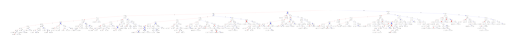

/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/

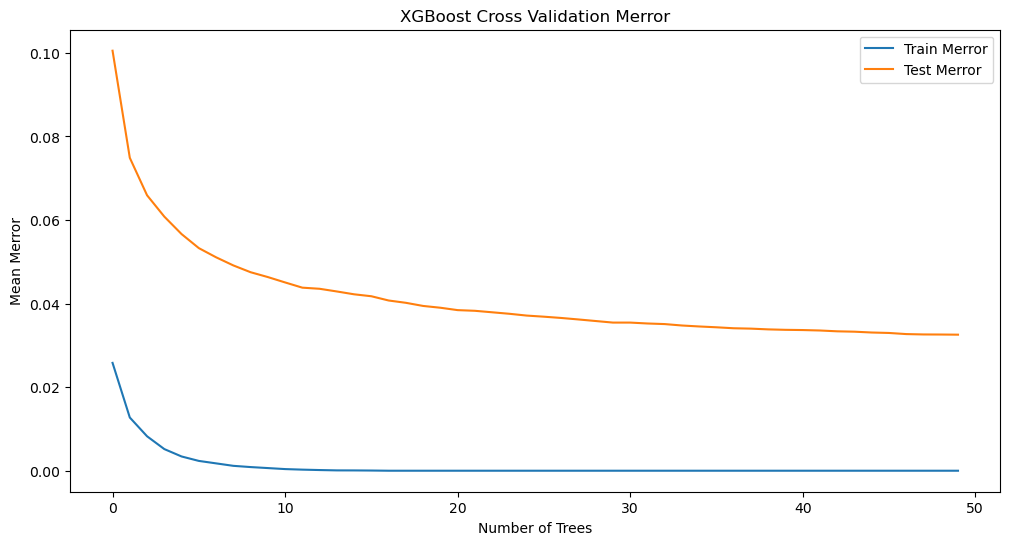

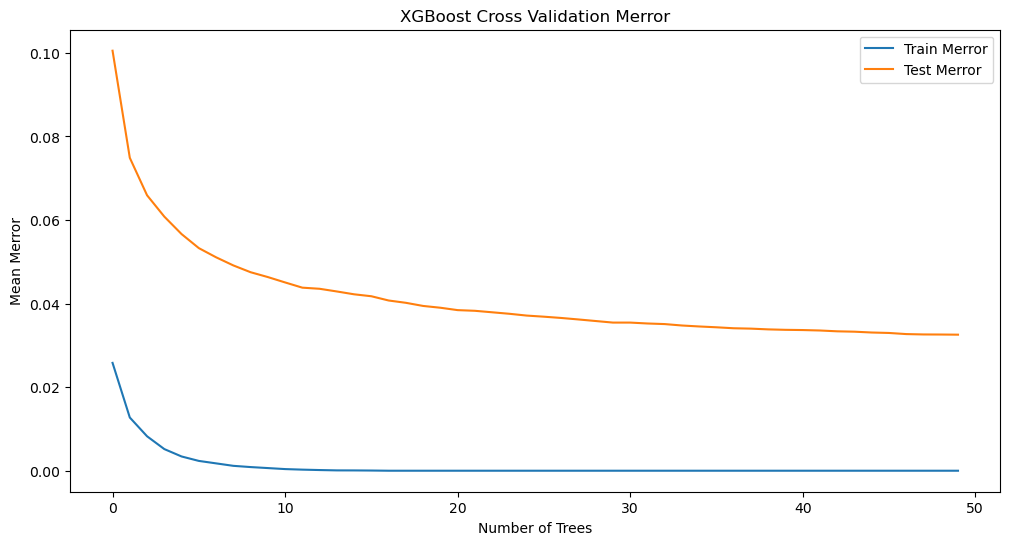

In [4]:
import matplotlib.pyplot as plt
from xgboost import cv

# 把树画出来
xgb.plot_tree(bst, num_trees=0)

plt.show()

cv_results = cv(params, dtrain, num_boost_round=50, nfold=3, metrics={'merror'}, early_stopping_rounds=10)
# 绘制训练和验证误差
plt.figure(figsize=(12, 6))
plt.plot(cv_results['train-merror-mean'], label='Train Merror')
plt.plot(cv_results['test-merror-mean'], label='Test Merror')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Merror')
plt.title('XGBoost Cross Validation Merror')
plt.legend()
plt.show()

# 绘制训练和验证误差
plt.figure(figsize=(12, 6))
plt.plot(cv_results['train-merror-mean'], label='Train Merror')
plt.plot(cv_results['test-merror-mean'], label='Test Merror')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Merror')
plt.title('XGBoost Cross Validation Merror')
plt.legend()
plt.show()

# dim测试

In [3]:
import torch

# 示例张量
input = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# 索引张量
index = torch.tensor([
    [0, 1, 1],  # 从第一行选择索引0, 1, 1的元素
    [2, 0, 1],  # 从第二行选择索引2, 0, 1的元素
    [1, 2, 0]   # 从第三行选择索引1, 2, 0的元素
])

# 在dim=1的维度上收集数据（按行收集）
output = torch.gather(input, 1, index)
print(output)


# 在dim=0的维度上收集数据（按列收集）
output = torch.gather(input, 0, index)
print(output)


tensor([[1, 2, 2],
        [6, 4, 5],
        [8, 9, 7]])
tensor([[1, 5, 6],
        [7, 2, 6],
        [4, 8, 3]])


In [4]:
# 写两个3d的tensor来测试gather中的dim参数
input = torch.tensor([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ]
])

index = torch.tensor([
    [
        [0, 1, 1],
        [2, 0, 1],
        [1, 2, 0]
    ],
    [
        [2, 0, 1],
        [1, 2, 0],
        [0, 1, 1]
    ]
])

# 在dim=1的维度上收集数据
output = torch.gather(input, 1, index)
print(output)

# 在dim=2的维度上收集数据
output = torch.gather(input, 2, index)
print(output)

tensor([[[ 1,  5,  6],
         [ 7,  2,  6],
         [ 4,  8,  3]],

        [[16, 11, 15],
         [13, 17, 12],
         [10, 14, 15]]])
tensor([[[ 1,  2,  2],
         [ 6,  4,  5],
         [ 8,  9,  7]],

        [[12, 10, 11],
         [14, 15, 13],
         [16, 17, 17]]])


In [5]:
input.shape

torch.Size([2, 3, 3])